# Dowdle's Breast Cancer Prediction
**Author:** Brittany Dowdle  
**Date:** March, 21, 2025  
**Objective:** To inspect, explore, and split data. Compare data splitting methods: train/test split and stratified shuffle split, by evaluating model performance.


## Introduction
This project uses the Breast Cancer dataset to predict diagnosis (malignant or benign) based on features such as mean radius, mean texture, and other tumor characteristics. I will clean the data, perform feature engineering, and explore ways to improve model performance. This project highlights the importance of balanced data representation in medical predictions.

****

## Imports
In the code cell below, import the necessary Python libraries for this notebook. All imports should be at the top of the notebook. 

In [2]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
from pandas.plotting import scatter_matrix

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Import dataset
from sklearn.datasets import load_breast_cancer
from scipy.stats import zscore

****
## Section 1. Import and Inspect the Data

### Load the breast cancer dataset from the directly from  `scikit-learn` for consistency and simplicity.
- Display basic information about the dataset using the info() method.
- Display the first 10 rows.
- Check for missing values using the isnull() method and then the sum() method. 
- Display summary statistics using the describe() method
- Check for correlations using the corr() method and tell it to use only the numeric features.

In [3]:
# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

# If command is not the last statement in a Python cell, you'll have to wrap in the print() function to display.
print('Info:')
print(df.info())
print('First 10 Rows:')
print(df.head(10))
print('Missing Values:')
print(df.isnull().sum())
print('Summary Statistics:')
print(df.describe())
print('Numeric Correlations:')
print(df.corr(numeric_only=True))

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error    

### Reflection 1:
1) How many data instances are there? **569 instances (rows)**
2) How many features are there? **31 features (columns)**
3) What are the names? **mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension, target**
4) Are there any missing values? **No, all instances have non-null values**
5) Are there any non-numeric features? **No, all features are numeric**
6) Are the data instances sorted on any of the attributes? **There is no indication it is**
7) What are the units of age? **Length-based features (mean radius, mean perimeter, worst radius): millimeters (mm). Area-based features (mean area, worst area): square millimeters (mm²)**
8) What are the minimum, median and max for mean perimeter? **Minimum: 43.79, median: 86.24, maximum: 188.50**
9) What two different features have the highest correlation? **The two features with the highest correlation are mean perimeter and mean radius. Perimeter is directly related to radius in circular and roughly spherical shapes.**
10) What 3 features might be useful for prediction? **Mean concave points, worst perimeter, mean fractal dimension.**

****

## Section 2. Data Exploration and Preparation
Now we need to explore our dataset with charts, we might need to clean it, and maybe do some feature engineering. Learning to figure out what you need is a key skill.

### 2.1 Explore Data Patterns and Distributions

- Create a correlation heatmap.
- Create a boxplot of mean radius by target.
- Create a pairplot of key features. 
- Create a histogram of worst texture.

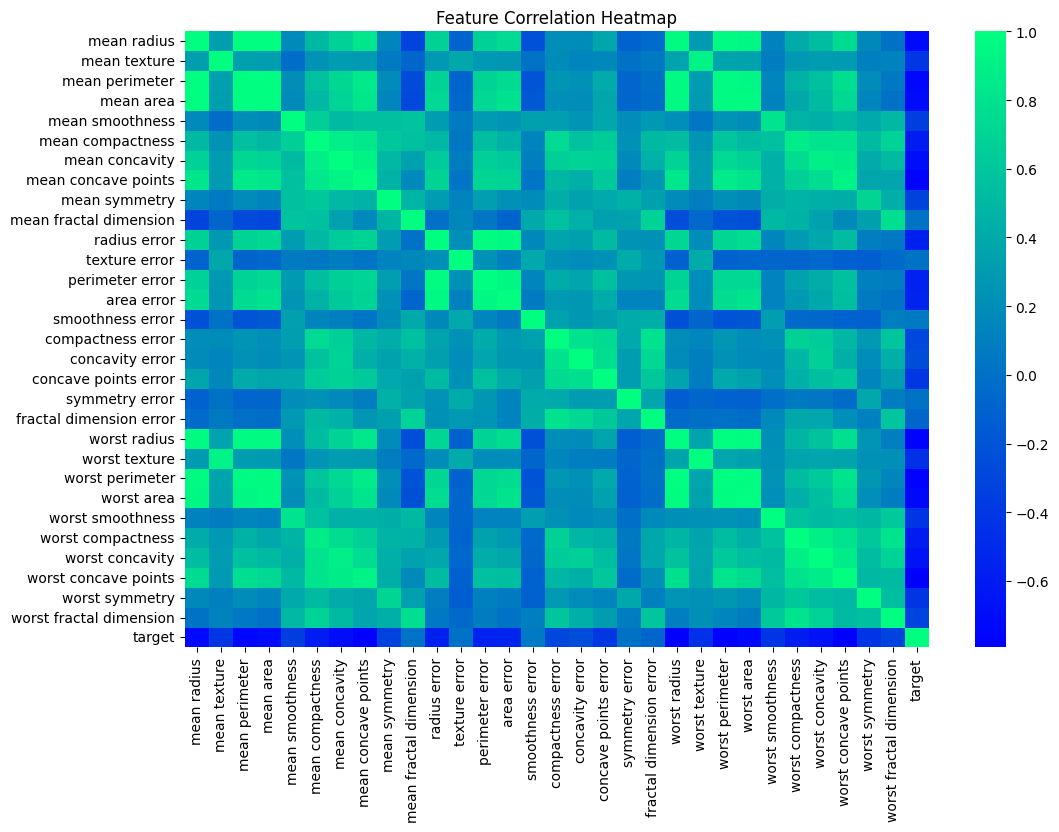

In [4]:
# Create a correlation heatmap. 

# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="winter")
# Title
plt.title("Feature Correlation Heatmap")
# Show the plot
plt.tight_layout
plt.show()

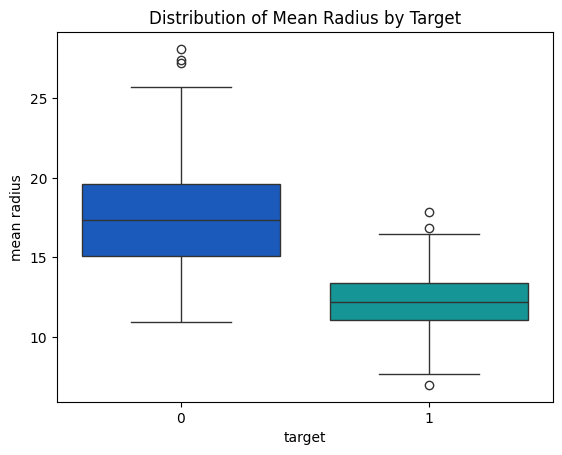

In [5]:
# Create a boxplot of mean radius by target
sns.boxplot(x='target', y='mean radius', data=df, hue='target', palette='winter', legend=False)
# Title
plt.title("Distribution of Mean Radius by Target")
# Show the plot
plt.tight_layout
plt.show()

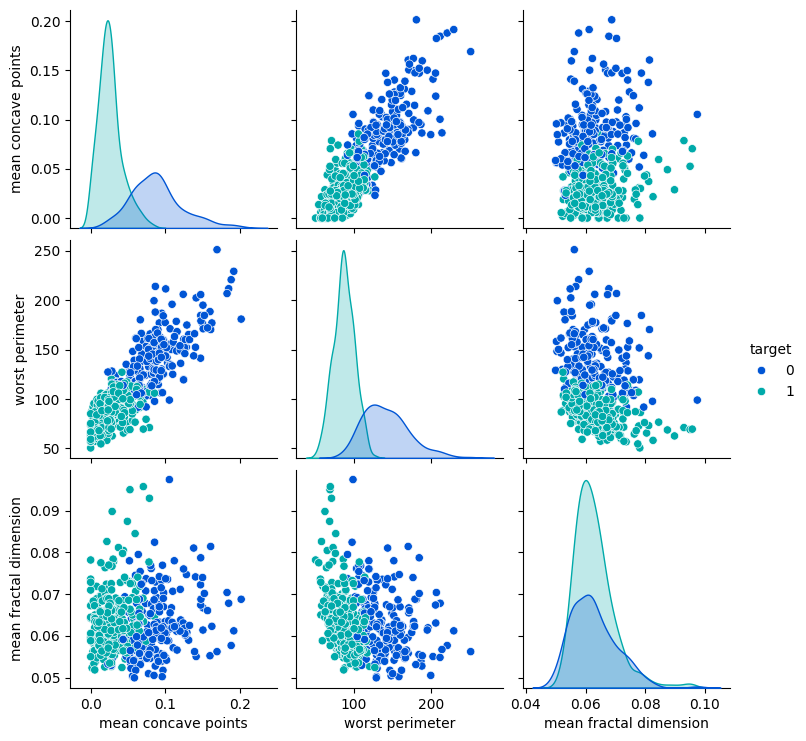

In [6]:
# Create a pairplot of key features
sns.pairplot(df, vars=['mean concave points', 'worst perimeter', 'mean fractal dimension'], hue='target', palette='winter')
# Show the plot
plt.tight_layout
plt.show()

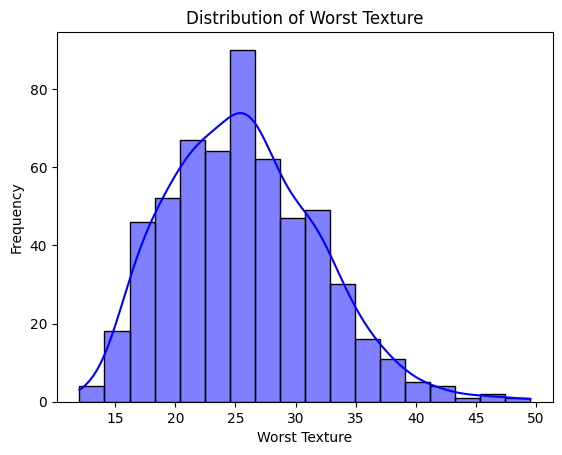

In [15]:
# Create a histogram of mean concave points
# Plot the histogram
sns.histplot(df['worst texture'], kde=True, color='blue')

# Title and labels
plt.title("Distribution of Worst Texture")
plt.xlabel("Worst Texture")
plt.ylabel("Frequency")

# Show the plot
plt.tight_layout
plt.show()


### Reflection 2.1:
1) What patterns or anomalies do you notice? **There appears to be a positive correlation between mean concave points and worst perimeter. There is some separation between the target variables in the scatter plots. Mean concave points and mean fractal dimension appear to be unimodal, while worst perimeter might be bimodal.**
2) Do any features stand out as potential predictors? **Worst perimeter and mean concave points.**
3) Are there any feature class imbalances? **Target variable seems to be imbalanced with much higher frequency of 1 (benign) then 0 (malignant).**

### 2.2 Handle Missing Values and Clean Data

- There are no missing values in this data set. I am going to check for duplicates instead.

In [8]:
# Count how many duplicate rows exist
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


### 2.3 Feature Engineering

- Change target to categorical variable for classification model.
- Identify outliers using z-score.(not transforming currently).

In [9]:
# Convert the target column from 0, 1 to 'B' and 'M'
df['target'] = df['target'].map({0: 'B', 1: 'M'})

# Check the first few rows to confirm the conversion
print(df['target'].head())

0    B
1    B
2    B
3    B
4    B
Name: target, dtype: object


In [10]:
# Calculate Z-scores
z_scores = zscore(df.drop('target', axis=1))

# Identify outliers: Z-score > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)
outliers_count = outliers.sum(axis=0)

# Display the features with the number of outliers
outliers_count

array([ 5,  4,  7,  8,  5,  9,  9,  6,  5,  7,  7,  9,  8,  6,  7, 12,  6,
        6, 11, 10,  6,  4,  6, 10,  3, 10,  7,  0,  9,  9])

### Reflection 2.3

1) Why might mean concave points be a useful feature for predicting the target? **Mean concave points are useful for predicting the target because they reflect the shape of the tumor, which can be indicative of whether the tumor is benign or malignant.**
2) Why convert categorical data to numeric? **Mapping categories to numbers ensures that models can identify patterns and relationships between features and the target variable (diagnosis). Machine learning models and statistical algorithms typically require numerical input.**

****

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target
For classification you need a categorical target variable (e.g., gender, species). Select two or more input features.

>Target: target
>
>Input features: mean concave points, mean area, and worst perimeter

### 3.2 Define X and y

- Assign input features to X
- Assign target variable to y (as applicable)

In [11]:
X = df[['mean concave points', 'mean area', 'worst perimeter']]
y = df['target']

### Reflection 3:

1) Why are these features selected? **They are highly related to the size, shape, and overall characteristics of the tumor, which could be important indicators in distinguishing between benign and malignant tumors.**
2) Are there any features that are likely to be highly predictive of target? **Mean fractal dimension: A feature related to the complexity of the tumor's shape. Higher fractal dimensions are often associated with more aggressive (malignant) tumors.**

****

## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. Compare.

### 4.1 Basic Train/Test split

In [12]:
# Split data into a training set and a test set
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=123)

# Show set sizes
print('Train size:', len(X_train_b))
print('Test size:', len(X_test_b))

Train size: 455
Test size: 114


### 4.2 Stratified Train/Test split

In [13]:
# Define how many splits, % of data for testing, and ensure reproducibility
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# Split data into a training set and a test set
for train_indices, test_indices in splitter.split(X, y):
    X_train_s = X.iloc[train_indices]
    X_test_s = X.iloc[test_indices]
    y_train_s = y.iloc[train_indices]
    y_test_s = y.iloc[test_indices]

# Show set sizes
print('Train size:', len(X_train_s))
print('Test size:', len(X_test_s))

Train size: 455
Test size: 114


### 4.3 Compare Results

In [14]:
print("\nOriginal Class Distribution:\n", y.value_counts(normalize=True))
print("\nBasic Split Distribution - Train Set:\n", y_train_b.value_counts(normalize=True))
print("\nBasic Split Distribution - Test Set:\n", y_test_b.value_counts(normalize=True))
print("\nStratified Split Distribution - Train Set:\n", y_train_s.value_counts(normalize=True))
print("\nStratified Split Distribution - Test Set:\n", y_test_s.value_counts(normalize=True))


Original Class Distribution:
 target
M    0.627417
B    0.372583
Name: proportion, dtype: float64

Basic Split Distribution - Train Set:
 target
M    0.624176
B    0.375824
Name: proportion, dtype: float64

Basic Split Distribution - Test Set:
 target
M    0.640351
B    0.359649
Name: proportion, dtype: float64

Stratified Split Distribution - Train Set:
 target
M    0.626374
B    0.373626
Name: proportion, dtype: float64

Stratified Split Distribution - Test Set:
 target
M    0.631579
B    0.368421
Name: proportion, dtype: float64


### Reflection 4:

1) Why might stratification improve model performance? **The dataset was imbalanced across target, and stratification ensures that both the training and test sets maintain the same class distribution as the original dataset. It helps the model learn from a more representative sample of the data, which leads to more reliable performance.**
2) How close are the training and test distributions to the original dataset? **Both the basic split and stratified split methods produced training sets that are very close to the original class distribution. The basic split test set shows a slightly more imbalanced distribution. The strat split test set is a bit skewed compared to the original distribution.**
3) Which split method produced better class balance? **The stratified split produced a better class balance for both the train and test sets, as it more closely reflects the original class distribution across both sets.**